In [ ]:
#필요한 패키지 임포트

In [1]:
import nltk #불용어 사전
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#데이터 수집하기

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
#수집한 데이터 확인

In [3]:
data.sample(10)

,headlines,text
44250,'Punish a Muslim Day' letters circulated acros...,"Letters encouraging people to take part in ""Pu..."
19279,England trail by 21 runs after Pujara scores 1...,England ended Day 2 of the fourth Test at 6/0 ...
63304,India's first Test captain played Ranji till 6...,"India's first-ever Test captain, Cottari Kanak..."
75287,Dr Kafeel made scapegoat in Gorakhpur tragedy:...,AIIMS' resident doctors have condemned the sac...
72946,Quantum teleportation achieved underwater for ...,"In a first, Chinese scientists have successful..."
30921,"Kareena, Kartik to star in Karan Johar's produ...","According to reports, Kareena Kapoor and Karti..."
43433,"BJP uses anger, we use love: Congress Prez Ra...",Addressing his first Congress plenary session ...
22367,Apple gets patent for Face ID feature on Mac,Apple has received a patent to incorporate the...
71626,Have more kids or we will need to employ robot...,Andhra Pradesh CM N Chandrababu Naidu on Monda...
86181,India's top IT firms received 37% less H-1B vi...,Top seven India-based outsourcing companies in...


In [7]:
#전체 샘플 수 확인
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [ ]:
#1. 추상적 요약

In [ ]:
# 데이터 전처리(추상적 요약)

In [ ]:
# 중복 데이터 제거

In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# 지정된 축의 고유한 요소 수를 계산하는 nunique 메소드 활용
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [ ]:
#headlines은 요약문이니까 다른 text를 보고 요약했지만 같을 수도 있다.
#하지만 text 중복은 명백히 중복 샘플이라는 의미이므로 제거

In [9]:
#중복 데이터 제거하는 drop_duplicates 메소드 활용
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [ ]:
#중복 데이터는 제거했지만, 
#그 중복 데이터에 null 값이 있었다면 중복되지 않은 null 값 1개도 제거해줘야 하기 때문에
#null값을 확인

In [10]:
#null 값을 확인하는 메소드 isnull 활용

print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [ ]:
#null 값은 없기에 dropna 메소드를 활용하여 null 값을 제거해 줄 필요는 없다.

In [ ]:
#중복 샘플 제거 완료, null 값도 없으니 
#데이터 정규화 및 불용어 처리 진행

In [ ]:
#데이터 정규화

In [12]:
#정규화 사전 준비
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [13]:
#불용어 사전 확인
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
#정규화 및 불용어 제거를 진행할 데이터 전처리 함수

def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary) 
    #Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 Summary에는 남아 있는 게 더 좋을 것 같습니다. 
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [16]:
#만든 함수 테스트 전처리 전후결과 확인

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [ ]:
# 만든 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리 수행
# text는 불용어 제거, headlines의 경우에는 불용어 제거하지 않을 예정이므로 따로 진행

In [17]:
# 전체 text 데이터에 대한 전처리

clean_text = []

for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [18]:
# 전체 headlines 데이터에 대한 전처리

clean_headlines = []

for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False)) #headlines은 불용어 제거하지 않음

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [56]:
# 데이터 정제 과정을 거쳤으니 다시 한번 빈 샘플이 생겼는지 확인해보기

data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

ValueError: Length of values (98360) does not match length of index (33533)

In [20]:
data.isnull().sum()

headlines    0
text         0
headliens    0
dtype: int64

In [ ]:
#null 값은 없기에 dropna 메소드를 활용하여 null 값을 제거해 줄 필요는 없다.

In [ ]:
#기본적인 정제는 끝났으니 학습에 사용할 데이터 크기를 결정하고 문장의 시작과 끝 표시를 진행

In [ ]:
#샘플의 최대 길이 정하기

In [ ]:
#text와 headlines의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 확인

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 18
요약의 평균 길이 : 9.553660024400163


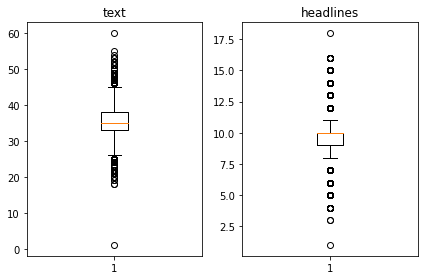

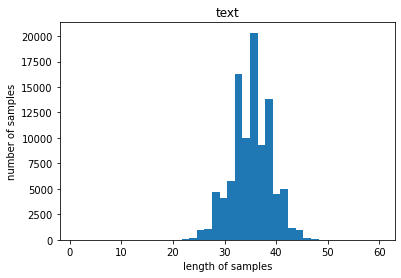

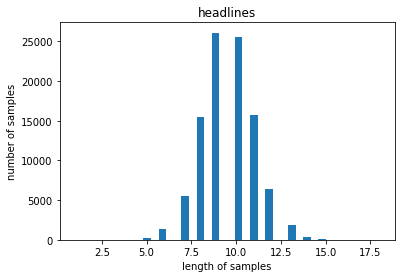

In [21]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#text, headlines 길이 모두 평균 길이를 중심으로 가까운 위치의 샘플들을 가장 많이 가지고 있음

In [50]:
#위의 결과를 바탕으로 적절한 최대최소 길이 설정
text_min_len = 32
text_max_len = 38
headlines_min_len = 9
headlines_max_len = 10

In [51]:
#최대최소길이를 제대로 설정했는지 확인을 위한 함수
def below_threshold_len(min_len, max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(min_len <= len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s이상 %s 이하인 샘플의 비율: %s'%(min_len, max_len, (cnt / len(nested_list))))

=3


In [52]:
#위에서 정의한 최대최소길이 확인 함수를 활용해 설정한 임의의 길이가 몇%의 샘플까지 포함하는지 확인
below_threshold_len(text_min_len, text_max_len, data['text'])
below_threshold_len(headlines_min_len, headlines_max_len, data['headlines'])

전체 샘플 중 길이가 32이상 38 이하인 샘플의 비율: 0.843087069168564
전체 샘플 중 길이가 9이상 10 이하인 샘플의 비율: 0.6241658161262463


In [53]:
#정제방식은 정해진 길이로 자르는 것이아닌 정해진 길이 이상이면 제외하는 방법으로 정제

data = data[data['text'].apply(lambda x: text_min_len <= len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: headlines_min_len <= len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 33533


In [54]:
#시작 토큰과 종료 토큰 추가하기

In [ ]:
#디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간에 문장 생성을 멈춘다.
#seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있다.

#시작 토큰 sostoken
#종료 토큰 eostoken
#디코더 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름 decoder_input
#디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름 decoder_target

In [55]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,headliens,decoder_input,decoder_target
2,New Zealand end Rohit Sharma-led India's 12-ma...,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken New Zealand end Rohit Sharma-led Indi...,New Zealand end Rohit Sharma-led India's 12-ma...
3,Aegon life iTerm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken Aegon life iTerm insurance plan helps...,Aegon life iTerm insurance plan helps customer...
5,Rahat Fateh Ali Khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,rahat fateh ali khan denies getting notice for...,sostoken Rahat Fateh Ali Khan denies getting n...,Rahat Fateh Ali Khan denies getting notice for...
10,UP cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,up cousins fed human excreta for friendship wi...,sostoken UP cousins fed human excreta for frie...,UP cousins fed human excreta for friendship wi...
16,"Karan Johar, Tabu turn showstoppers on opening...",filmmaker karan johar actress tabu turned show...,karan johar tabu turn showstoppers on opening ...,"sostoken Karan Johar, Tabu turn showstoppers o...","Karan Johar, Tabu turn showstoppers on opening..."


In [57]:
# 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 numpy 타입으로 저장

encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [ ]:
#훈련 데이터와 테스트 데이터를 분리

In [ ]:
#우선, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기

In [58]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[17410 11868 19310 ... 29148 32381 23788]


In [ ]:
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 잘 섞인 샘플로 만들기

In [59]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [60]:
#이제 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리. 

n_of_val = int(len(encoder_input)*0.2) #전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 6706


In [61]:
# 이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 26827
훈련 레이블의 개수 : 26827
테스트 데이터의 개수 : 6706
테스트 레이블의 개수 : 6706


In [ ]:
#정수 인코딩

In [62]:
#이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸는 작업 진행

In [ ]:
#훈련 데이터에 대해서 단어 집합 만들기. 우선 원문에 해당되는 encoder_input_train에 대해서 단어 집합 생성

In [63]:
#Keras의 토크나이저를 사용

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

=3


In [ ]:
#위의 과정으로 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여
#현재 생성된 단어 집합은 src_tokenizer.word_index에 저장
#하지만 이렇게 만든 단어 집합에 있는 모든 단어를 사용하지 않고, 빈도수가 낮은 단어들은 제외하고 진행
#따라서 빈도수가 7회 미만인 단어들이 이 데이터에서 얼마만큼의 비중을 차지하는지 확인
#src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장되어 있어 이를 통해 통계적인 정보를 얻기

In [64]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43440
등장 빈도가 6번 이하인 희귀 단어의 수: 30643
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 12797
단어 집합에서 희귀 단어의 비율: 70.54097605893186
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.732182082246194


In [ ]:
##################################################################################################
#3만 여개의 단어가 있지만
#등장 빈도가  7회 미만 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지
#하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39%밖에 되지 않음
#그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거

In [65]:
src_vocab = 12000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 12,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [66]:
#texts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행
#현재 단어 집합의 크기를 12,000으로 제한했으니까 이제 12,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않음

In [67]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[188, 2838, 249, 7905, 1860, 428, 174, 495, 570, 453, 2224, 3144, 5345, 607, 662, 7905, 7906, 7907, 53, 365, 22, 1308, 7907, 1641, 624, 5345, 395, 1278, 583], [253, 712, 95, 1605, 2394, 479, 58, 11, 133, 4829, 694, 5, 54, 315, 3731, 11751, 2750, 253, 370, 20, 102, 210, 6, 3189, 3096, 678, 4030, 54, 43, 2394, 479, 467, 662, 11, 31, 112, 3], [7908, 6536, 1669, 220, 24, 270, 92, 11752, 5346, 9598, 679, 6536, 1669, 746, 6115, 1617, 65, 3016, 9598, 1, 2275, 2590, 7908, 188, 197, 218, 6536, 1669, 220, 563, 6537]]


In [ ]:
#Summary 데이터에 대해서도 동일한 작업 진행
#케라스의 토크나이저를 사용하여 decoder_input_train을 입력으로 전체 단어 집합과 각 단어에 대한 빈도수를 계산

In [68]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [69]:
#위의 과정으로 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여
#현재 생성된 단어 집합은 tar_tokenizer.word_index에 저장
#하지만 이렇게 만든 단어 집합에 있는 모든 단어를 사용하지 않고, 빈도수가 낮은 단어들은 제외하고 진행
#따라서 빈도수가 6회 미만인 단어들이 이 데이터에서 얼마만큼의 비중을 차지하는지 확인
#tar_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장되어 있어 이를 통해 통계적인 정보를 얻기

In [70]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 24782
등장 빈도가 5번 이하인 희귀 단어의 수: 18788
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5994
단어 집합에서 희귀 단어의 비율: 75.81309014607376
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.480780911062908


In [ ]:
####################################################################################
#등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 77%를 차지하고 있네요. 
#하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.87%밖에 되지 않아요. 
#아까 했던 것과 동일하게 이 단어들은 모두 제거할게요. 어림잡아 2,000을 단어 집합의 크기로 제한할게요.

In [71]:
tar_vocab = 5000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 519, 141, 6, 3024, 2212], [1, 1050, 1778, 193, 267, 40, 457, 4787, 6, 13, 440, 179, 471], [1, 4361, 1779, 3, 908, 27, 12, 25, 166], [1, 1780, 183, 788, 56, 12, 325, 66], [1, 696, 1930, 4788, 2426, 15, 297, 4, 109, 251, 2213]]
target
decoder  [[519, 141, 6, 3024, 2212, 2], [1050, 1778, 193, 267, 40, 457, 4787, 6, 13, 440, 179, 471, 2], [4361, 1779, 3, 908, 27, 12, 25, 166, 2], [1780, 183, 788, 56, 12, 325, 66, 2], [696, 1930, 4788, 2426, 15, 297, 4, 109, 251, 2213, 2]]


In [ ]:
##################################################################################
#정상적으로 정수 인코딩 작업 완료
#현재 decoder_input_train과 decoder_target_train에는 더 이상 숫자 5,000이 넘는 숫자들은 존재하지 않음

In [ ]:
#패딩 작업으로 넘어가기 전 빈도수가 낮은 단어 삭제로 인해 빈 샘플이 생겼을 가능성이 있기 때문에 확인하여 제거 진행 필요
#주의할 점은 decoder_input에는 sostoken, decoder_target에는 eostoken이 추가된 상태라서 길이가 0이 된 요약문의 실제길이는 1

In [72]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 26827
훈련 레이블의 개수 : 26827
테스트 데이터의 개수 : 6706
테스트 레이블의 개수 : 6706


In [ ]:
#우리가 사용한 데이터의 경우 headline 도 꽤 긴 문장이어서 빈 샘플이 발생하지 않은 것 같음

In [ ]:
#패딩하기
#서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업 필요

In [74]:
#최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춤
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

In [ ]:
#모델 설계하기

In [75]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [76]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

#디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일
#하지만 LSTM의 입력을 정의할 때,
#initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 함

In [77]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 38, 128)      1536000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 38, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
#어텐션 메커니즘

In [78]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 38, 128)      1536000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 38, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [ ]:
#모델 훈련하기

In [79]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
105/105 [==============================] - 64s 531ms/step - loss: 6.2287 - val_loss: 5.8293
Epoch 2/50
105/105 [==============================] - 55s 522ms/step - loss: 5.8054 - val_loss: 5.5676
Epoch 3/50
105/105 [==============================] - 55s 524ms/step - loss: 5.5953 - val_loss: 5.4484
Epoch 4/50
105/105 [==============================] - 54s 518ms/step - loss: 5.4158 - val_loss: 5.2627
Epoch 5/50
105/105 [==============================] - 55s 520ms/step - loss: 5.2215 - val_loss: 5.1486
Epoch 6/50
105/105 [==============================] - 54s 517ms/step - loss: 5.0541 - val_loss: 5.0075
Epoch 7/50
105/105 [==============================] - 54s 516ms/step - loss: 4.8985 - val_loss: 4.9086
Epoch 8/50
105/105 [==============================] - 54s 512ms/step - loss: 4.7548 - val_loss: 4.8359
Epoch 9/50
105/105 [==============================] - 54s 512ms/step - loss: 4.6243 - val_loss: 4.7610
Epoch 10/50
105/105 [==============================] - 54s 517ms/step - l

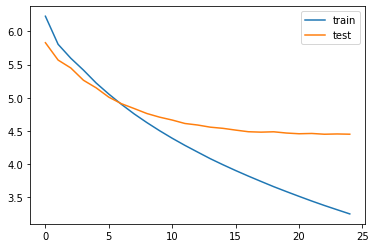

In [80]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#인퍼런스 모델 구현하기

In [ ]:
#테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 
#필요한 3개의 사전을 아래와 같이 미리 준비

In [81]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음


In [ ]:
#seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행

In [82]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


In [ ]:
#어텐션 메커니즘을 사용하는 출력층을 설계

In [83]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [87]:
#인퍼런스 단계에서 단어 시퀀스를 완성하는 함수

def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [88]:
# 모델 테스트하기

In [89]:
#테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인

In [90]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
# Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 헤드라인의 정수 시퀀스를 텍스트 시퀀스로 변환
# 헤드라인의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp


In [91]:
# 테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교

In [92]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : flight operations suspended nearly hour delhi indira gandhi international airport sunday pilot reported spotted drone area three closed several flights diverted airport flight operations resumed getting clearance delhi police officials said 
실제 요약 : flight operations shut at delhi airport over drone 
예측 요약 :  passengers passengers stranded at airport after mumbai airport


원문 : uk raise issue alleged persecution christians sikhs pm narendra modi commonwealth heads government meeting london follows demands uk mps bring issue citing details alleged punjab kerala apart india mps also cited persecution minorities pakistan bangladesh 
실제 요약 : uk to discuss of sikhs with india 
예측 요약 :  india to be from india pm modi


원문 : year old pakistani model saturday found dead husband residence lahore body found hanging ceiling fan mother revealed mental stress scheduled meet cannot confirm stage whether committed suicide murdered said police 
실제 요약 : 26 year old pakistani model found dead at he

예측 요약 :  rahul gandhi is a of karnataka cm


원문 : least people killed three lakh others evacuated china due floods past days according reports china national weather observatory issued alert third consecutive day sunday southern part country due summer season 
실제 요약 : south china floods kill 15 over 3 lakh people 
예측 요약 :  2 killed as explosion at in


원문 : us city give several hundred low income residents month part program called economic empowerment demonstration program introduced year old mayor michael hoping eliminate city economic burden notably filed bankruptcy year 
실제 요약 : city to give poor residents over ã¢ââ¹30 000 a month 
예측 요약 :  uae to be closed for


원문 : actress deepika padukone featured cover august edition women magazine actress wearing sports nike layered top belt red jacket dior hung shoulders deepika finished look pair heels christian 
실제 요약 : deepika padukone features on august cover of magazine 
예측 요약 :  deepika features on cover of magazine cover


원문 : briha

예측 요약 :  bitcoin sells for auction self worth car




In [ ]:
#추출적 요약해보기

In [115]:
#summarize 사용하기

#text (str) : 요약할 테스트.
#ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
#words (int or None, optional) – 출력에 포함할 단어 수.
#만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
#split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

import requests
from summa.summarizer import summarize

In [100]:
#print(type(clean_text))
#print(type(clean_text[0]))

<class 'list'>
<class 'str'>


In [99]:
clean_text_str = "\n".join(map(str, clean_text))

In [116]:
for i in range(5):
    print(clean_text[i])
    print("\n")

saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers


kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit


new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history


aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure critical illnesses 

In [119]:

print('Extractive_headlines:')
print(summarize(clean_text[2], words=50))

Extractive_headlines:



In [120]:
clean_text[5]

'pakistani singer rahat fateh ali khan denied receiving notice enforcement directorate allegedly smuggling foreign currency india would better authorities would served notice first publicised reads press release issued behalf rahat statement called allegation bizarre'

In [125]:
a = summarize(clean_text[5], words=100)

In [126]:
a

''